In [1]:
import xarray as xr

In [2]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
from xmitgcm import open_mdsdataset

In [5]:
data_dir = "/pool001/xruan/RT_canyon_hydrostatic/diag/"
grid_dir = "/pool001/xruan/RT_canyon_hydrostatic/input/"
ds = open_mdsdataset(
    data_dir, grid_dir = grid_dir, iters="all", prefix=["TS_inst", "tracer_inst"],
    ignore_unknown_vars=True, delta_t = 5.
).drop(["maskC", "maskInC"]).drop_dims(["Zl", "Zu", "Zp1", "YG", "XG"])

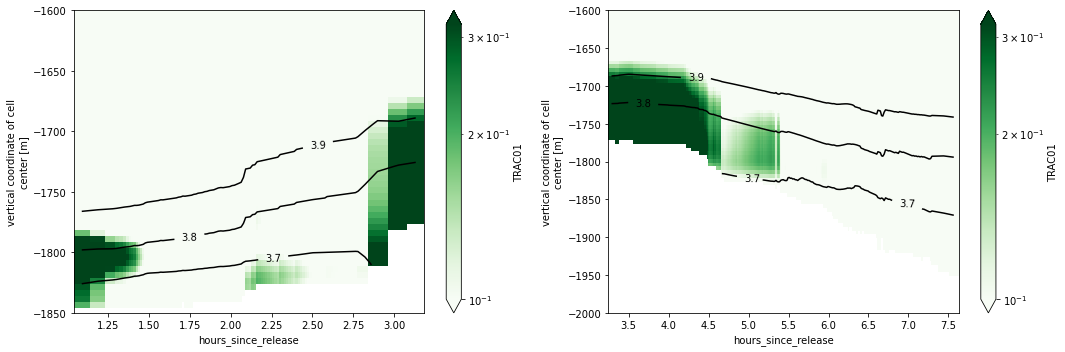

In [4]:
fig = plt.figure(figsize=(15, 5))

ax = plt.subplot(1,2,1)

tr = xr.open_dataset("data/simulated_transects/upcanyon1_realistic.nc")
pc = tr['TRAC01'].where(tr['TRAC01']>=0.).plot(
    ax=ax, x="hours_since_release", y="Z",
    cmap="Greens",  norm=matplotlib.colors.LogNorm(vmin=10**(-1.), vmax=10**(-0.5))
)
cs = tr['THETA'].where(tr['THETA']!=0.).plot.contour(ax=ax, x="hours_since_release", levels=[3.7, 3.8, 3.9], colors="k")
ax.clabel(cs, inline=1, fontsize=10)
ax.set_ylim(-1850, -1600)

# axins = inset_axes(ax, width="80%", height="80%",
#                    bbox_to_anchor=(.05, .58, .35, .4),
#                    bbox_transform=ax.transAxes, loc=1)
# ds.Depth.plot.contour(ax=axins, levels=np.arange(0, 3500., 100.), colors='k', linewidths=1., alpha=0.3)
# axins.annotate('', xy=(tr.XC[-1].values, tr.YC[-1].values), xycoords='data',
#             xytext=(tr.XC[0], tr.YC[0].values), textcoords='data',
#             arrowprops=dict(facecolor='black', headlength=3.5, width=1.5, headwidth=6., alpha=0.4)
# )
# axins.plot(release_loc[0], release_loc[1], "C3*", label="simulated")
# axins.plot(actual_release[0], actual_release[1], "C0s", label="'actual'", markersize=4)
# axins.legend(loc="upper left", fontsize=9)
# axins.grid(True, alpha=0.15)
# axins.set_xlim(-11.975, -11.87)
# axins.set_ylim(54.18, 54.26)
# axins.set_ylabel("")
# axins.set_xlabel("")


ax = plt.subplot(1,2,2)
tr = xr.open_dataset("data/simulated_transects/downcanyon1_realistic.nc")
pc = tr['TRAC01'].where(tr['TRAC01']>=0.).plot(
    ax=ax, x="hours_since_release", y="Z",
    cmap="Greens",  norm=matplotlib.colors.LogNorm(vmin=10**(-1.), vmax=10**(-0.5))
)
cs = tr['THETA'].where(tr['THETA']!=0.).plot.contour(ax=ax, x="hours_since_release", levels=[3.7, 3.8, 3.9], colors="k")
ax.clabel(cs, inline=1, fontsize=10)
ax.set_ylim(-2000, -1600)

# axins = inset_axes(ax, width="80%", height="80%",
#                    bbox_to_anchor=(.05, .005, .35, .4),
#                    bbox_transform=ax.transAxes, loc=1)
# ds.Depth.plot.contour(ax=axins, levels=np.arange(0, 3500., 100.), colors='k', linewidths=1., alpha=0.3)
# axins.annotate('', xy=(tr.XC[-1].values, tr.YC[-1].values), xycoords='data',
#             xytext=(tr.XC[0], tr.YC[0].values), textcoords='data',
#             arrowprops=dict(facecolor='black', headlength=3.5, width=1.5, headwidth=6., alpha=0.4)
# )
# axins.plot(release_loc[0], release_loc[1], "C3*", label="simulated")
# axins.plot(actual_release[0], actual_release[1], "C0s", label="'actual'", markersize=4)
# axins.legend(loc="upper left")
# axins.grid(True, alpha=0.15)
# axins.set_xlim(-11.975, -11.87)
# axins.set_ylim(54.18, 54.26)
# axins.set_ylabel("")
# axins.set_xlabel("")

plt.tight_layout()

Text(0.5, 0, '')

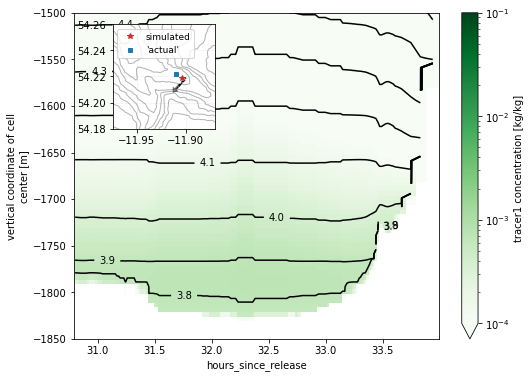

In [78]:
plt.figure(figsize=(18, 6))

ax = plt.subplot(1,2,1)
tr = transects["crosscanyon1"]
pc = tr['TRAC01'].where(tr['TRAC01']>=0.).plot(ax=ax, x="hours_since_release", y="Z", cmap="Greens",  norm=matplotlib.colors.LogNorm(vmin=1e-4, vmax=1.e-1))
cs = tr['THETA'].where(tr['THETA']!=0.).plot.contour(ax=ax, x="hours_since_release", levels=np.arange(3.8, 4.5, 0.1), colors="k")
ax.clabel(cs, inline=1, fontsize=10)
ax.set_ylim(-1850, -1500)

axins = inset_axes(ax, width="80%", height="80%",
                   bbox_to_anchor=(.05, .58, .35, .4),
                   bbox_transform=ax.transAxes, loc=1)
ds.Depth.plot.contour(ax=axins, levels=np.arange(0, 3500., 100.), colors='k', linewidths=1., alpha=0.3)
axins.plot(tr['XC'], tr['YC'], "k.", markersize=0.5, alpha=0.3)
axins.annotate('', xy=(tr.XC[-1].values, tr.YC[-1].values), xycoords='data',
            xytext=(tr.XC[0], tr.YC[0].values), textcoords='data',
            arrowprops=dict(facecolor='black', headlength=3.5, width=1.5, headwidth=6., alpha=0.4)
)
axins.plot(release_loc[0], release_loc[1], "C3*", label="simulated")
axins.plot(actual_release[0], actual_release[1], "C0s", label="'actual'", markersize=4)
axins.legend(loc="upper left", fontsize=9)
axins.grid(True, alpha=0.15)
axins.set_xlim(-11.975, -11.87)
axins.set_ylim(54.18, 54.26)
axins.set_ylabel("")
axins.set_xlabel("")


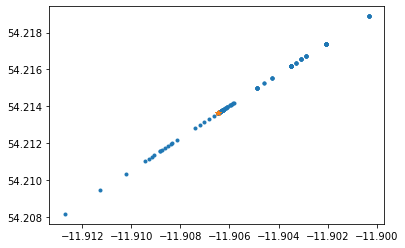

In [79]:
plt.plot(tr['XC'], tr['YC'], ".")
plt.plot(tr['XC'][0], tr['YC'][0], "*")

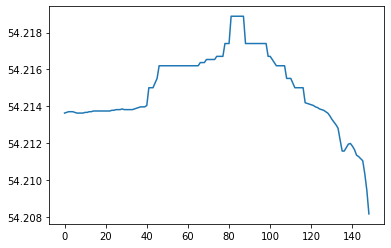

In [80]:
plt.plot(tr['YC'])